In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

In [176]:
df=pd.read_csv('iris.csv', sep=',',header=None)
data = df.values
print(data)
# we need to rm 'Versicolor'
# we need only binary class
# keep titles
titles = data[0]

[['sepal.length' 'sepal.width' 'petal.length' 'petal.width' 'variety']
 ['5.1' '3.5' '1.4' '.2' 'Setosa']
 ['4.9' '3' '1.4' '.2' 'Setosa']
 ['4.7' '3.2' '1.3' '.2' 'Setosa']
 ['4.6' '3.1' '1.5' '.2' 'Setosa']
 ['5' '3.6' '1.4' '.2' 'Setosa']
 ['5.4' '3.9' '1.7' '.4' 'Setosa']
 ['4.6' '3.4' '1.4' '.3' 'Setosa']
 ['5' '3.4' '1.5' '.2' 'Setosa']
 ['4.4' '2.9' '1.4' '.2' 'Setosa']
 ['4.9' '3.1' '1.5' '.1' 'Setosa']
 ['5.4' '3.7' '1.5' '.2' 'Setosa']
 ['4.8' '3.4' '1.6' '.2' 'Setosa']
 ['4.8' '3' '1.4' '.1' 'Setosa']
 ['4.3' '3' '1.1' '.1' 'Setosa']
 ['5.8' '4' '1.2' '.2' 'Setosa']
 ['5.7' '4.4' '1.5' '.4' 'Setosa']
 ['5.4' '3.9' '1.3' '.4' 'Setosa']
 ['5.1' '3.5' '1.4' '.3' 'Setosa']
 ['5.7' '3.8' '1.7' '.3' 'Setosa']
 ['5.1' '3.8' '1.5' '.3' 'Setosa']
 ['5.4' '3.4' '1.7' '.2' 'Setosa']
 ['5.1' '3.7' '1.5' '.4' 'Setosa']
 ['4.6' '3.6' '1' '.2' 'Setosa']
 ['5.1' '3.3' '1.7' '.5' 'Setosa']
 ['4.8' '3.4' '1.9' '.2' 'Setosa']
 ['5' '3' '1.6' '.2' 'Setosa']
 ['5' '3.4' '1.6' '.4' 'Setosa']
 ['5

In [166]:
# remove titles
data = data[1:]

# datas
datas = np.zeros((100, 4))
labels = np.zeros((100, 1))

cpt = 0
for i in range(len(data)):
    if data[i][-1] == 'Setosa':
        tmp_data = data[i]
        datas[cpt] = tmp_data[:-1]
        labels[cpt] = ['-1']
        cpt += 1
    elif data[i][-1] == 'Virginica':
        tmp_data = data[i]
        datas[cpt] = tmp_data[:-1]
        labels[cpt] = ['1']
        cpt += 1

print(datas)
print(labels)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.

In [179]:
def get_column(np_array, col, begin, end):
    new = np.zeros((50,1))
    cpt = 0
    for i in range(begin, end):
        new[cpt] = np_array[i][col]
        cpt += 1
    return new

def display(nb_feature1, nb_feature2):
    set_x = get_column(datas, nb_feature1, 0, 50) # feature 1
    set_y = get_column(datas, nb_feature2, 0, 50) # feature 3

    vir_x = get_column(datas, nb_feature1, 50, 100) # feature 1
    vir_y = get_column(datas, nb_feature2, 50, 100) # feature 3

    plt.scatter(set_x, set_y, marker='+', color='green')
    plt.scatter(vir_x, vir_y, marker='_', color='red')
    plt.xlabel(titles[nb_feature1])
    plt.ylabel(titles[nb_feature2])
    plt.show()

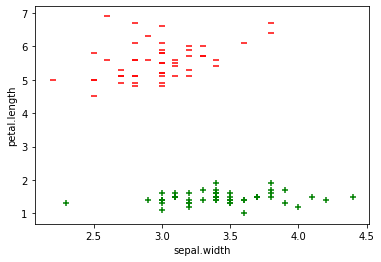

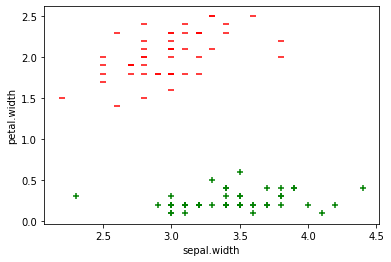

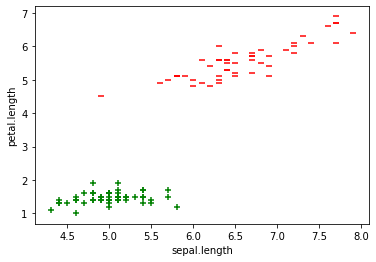

In [180]:
display(1, 2)
display(1, 3)
display(0, 2)

In [190]:
labels = np.reshape(labels, 100)

In [192]:
model = SVC(gamma='auto')

In [193]:
model.fit(datas, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [196]:
print(model.predict([datas[0]]))
print(model.predict([datas[79]]))

[-1.]
